In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ]
)


In [3]:
from sklearn.model_selection import train_test_split

x = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'MLP Classifier': MLPClassifier()
}


In [5]:
pipeline_models = {}
accuracy_scores = {}

for name, model in models.items():
    pipeline = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('model', model),
        ]
    )
    pipeline.fit(x_train, y_train)
    pipeline_models[name] = pipeline

    # fill accuracy
    y_pred = pipeline.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

C:\Users\Mo\.conda\envs\sk_env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Mo\.conda\envs\sk_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Mo\.conda\envs\sk_env\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mo\.conda\envs\sk_env\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Mo\.conda\envs\sk_env\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht

In [16]:
df_models = pd.DataFrame(accuracy_scores.items(), columns=['model', 'score'])
df_models.head()

,model,score
0,Logistic Regression,0.872340
1,K-Nearest Neighbors,0.820331
2,Decision Tree,0.936170
3,Random Forest,0.950355
4,SVC,0.931442


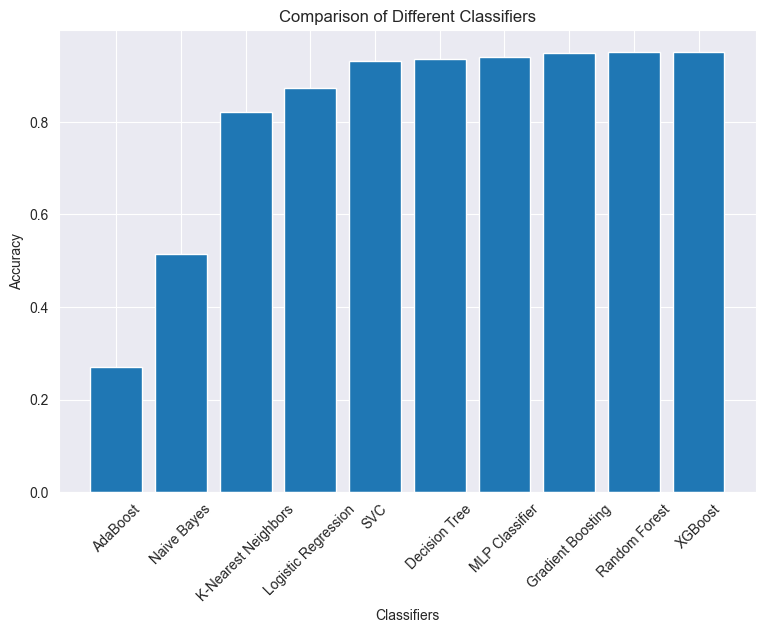

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

plt.bar('model', 'score', data=df_models.sort_values('score'))
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')
plt.title('Comparison of Different Classifiers')
plt.xticks(rotation=45)
plt.show()


In [19]:
import pickle
import os

# Save each model separately
if not os.path.isdir('models'):
    os.makedirs('models')

for name, pipeline in pipeline_models.items():
    model = pipeline.named_steps['model']
    with open(f'models/{name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)


In [80]:
def predict_from_model(model_name, ind):
    loaded_pipeline = pipeline_models.get(model_name)
    if loaded_pipeline is None:
        print(f"Model '{model_name}' not found!")
        return

    data = x_test.iloc[ind:ind+1]
    real = y_test.iloc[ind]

    predictions = loaded_pipeline.predict(data)
    print("Predictions:", predictions)
    print("Real:", real)


In [81]:
# Choose the model to use for prediction
model_name = 'Logistic Regression'  # Choose the model name from the saved models
predict_from_model(model_name, 8)

Predictions: [2]
Real: 2
